# College Scorecard Analysis

**Yumeng Ding**  <br/>
**DATA512 Human Centered Data Science**  <br/>
**University of Washington**

## Introduction

Choosing what colleges to apply to is an important decision to make for any graduating seniors, and the question is even more broad and influential for an international student trying to pursue education in the United States. My analysis will be adopting an international student as my user persona and explore the [College Scorecard](https://collegescorecard.ed.gov/data/) dataset made public by [the Obama Administration designed to increase transparency](https://obamawhitehouse.archives.gov/the-press-office/2015/09/12/fact-sheet-empowering-students-choose-college-right-them) in the education system. What do international students consider when applying to colleges? First, they will mainly focus on four-year degree granting institutions since they provide better faculty resource and research opportunities. Secondly, they will want to find universities that are inclusive of different races and promote racial diversity. Lastly, they want to have an education that will help their future careers, while in this analysis, we will use post-school earnings as a potential indicator of career trajectory. 

Motivated by the above senario, this project report will use most recent college scorecard dataset and post-school earnings data to explore the differences in education availability and accessibility across states and regions to help identify potential drivers for a higher post-school earning.

## Background

Since the release of College Scorecard data, U.S. Department of Education built a [tool](https://collegescorecard.ed.gov) for students and parents to find schools and compare schools. The major selection drop downs are programs/degrees, Location, Size and Name. There is also an advance search option where users can choose type of school, specialized mission and religious affiliation. However, there aren't a central location where information over all the states are visualized for a better general picture. Moreover, the website does not provide linkage between school and post-school earnings information, even though future earnings is one of the decision drivers for some students.

Therefore, I want to leverage these public data to provide an analysis on higher education availability across different states while also provide insights into what are the factors for a higher post-school earning.

## Methods

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,7)

### Data Overview

There are two main datasets used in this report:
* **'Most_recent_data.csv'** contains information on 7175 US higher education institutions in 2016-2017 year. The complete dataset has 7175 rows and 1899 columns, with variableds including geographical locations, degree offerings, majors, student body information, faculty information, etc. We will be limiting to five areas in this analysis focusing on availabity of schools and racial composition.
* **'Post-school_earnings.csv'** contains post-school earnings report for the same 7175 US higher education institutions reported in 2017. The data includes comprehensive measures of employment status and earningss data subgrouped into 10, 8, 7 and 6 years after entry. 

All datasets used for this projects are publicly available and accessible under [CC0 1.0 Universal (CC0 1.0) Public Domain Dedication](https://creativecommons.org/publicdomain/zero/1.0/) within the United States.

### Data Preparation

#### Load in both most recent scorecard dataset and post-school earnings dataset

Both datasets can be downloaded locally for processing and analysis. The 'Most_recent_data.csv' is compressed to fit on github, therefore user will need to unzip the file for before running the code.

Users can also use API calls to access the data [here](http://api.data.gov/ed/collegescorecard/). 

The full datasets of scorecard data contains 7175 rows and 1899 columns as described below. <br/>
The full datasets of post school earning data contains 7175 rows and 92 columsn as described below.

We will clean both datasets in the next section in preparation of the analysis

In [3]:
scorecard = pd.read_csv('Most_recent_data.csv', sep=',', header='infer', low_memory=False)

In [4]:
scorecard.shape

(7175, 1899)

In [5]:
scorecard.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP6_FTNFT_POOLED_SUPP,OMAWDP8_FTNFT_POOLED_SUPP,OMENRYP8_FTNFT_POOLED_SUPP,OMENRAP8_FTNFT_POOLED_SUPP,OMENRUP8_FTNFT_POOLED_SUPP,OMAWDP6_PTNFT_POOLED_SUPP,OMAWDP8_PTNFT_POOLED_SUPP,OMENRYP8_PTNFT_POOLED_SUPP,OMENRAP8_PTNFT_POOLED_SUPP,OMENRUP8_PTNFT_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,...,0.4694,0.5136,0.0034,0.1429,0.3401,0.3333,0.3333,0,0,0.6667
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,0.6117,0.624,0.0075,0.2166,0.1519,0.3642,0.4,0.0434,0.2755,0.2811
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.5503,0.5562,0.0059,0.4379,0,0.4429,0.4714,0.0429,0.4857,0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.5456,0.5651,0.0123,0.2841,0.1385,0.3378,0.3547,0.0236,0.4257,0.1959
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.4105,0.429,0.0062,0.216,0.3488,0.2931,0.3103,0.0345,0.3966,0.2586


In [6]:
post_school_earning = pd.read_csv('Post-school_earnings.csv', sep=',', header='infer', low_memory=False)

In [7]:
post_school_earning.shape

(7175, 92)

In [8]:
post_school_earning.head()

,UNITID,OPEID,OPEID6,INSTNM,COUNT_ED,AGEGE24,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,...,SD_EARN_WNE_P8,GT_25K_P8,COUNT_NWNE_P9,COUNT_WNE_P9,MN_EARN_WNE_P9,SD_EARN_WNE_P9,GT_25K_P9,GT_28K_P10,GT_28K_P8,GT_28K_P6
0,100654,100200,1002,Alabama A & M University,NaN,0.07999999821186,46.8400001525878,47.9799995422363,1.48000001907348,3.78999996185302,...,20100,0.544,215,1480,33800,27500,0.58783781528472,0.567,0.483,0.431
1,100663,105200,1052,University of Alabama at Birmingham,NaN,0.25999999046325,69.0199966430664,27.7600002288818,1.10000002384185,2.02999997138977,...,36500,0.722,347,2592,44500,38600,0.73726850748062,0.726,0.686,0.631
2,100690,2503400,25034,Amridge University,NaN,0.82999998331069,70.8799972534179,22.5300006866455,1.28999996185302,6.94000005722046,...,33900,0.668,41,174,42400,30500,0.7356321811676,0.7,0.631,0.542
3,100706,105500,1055,University of Alabama in Huntsville,NaN,0.28999999165534,76.3799972534179,18.9799995422363,1.41999995708465,2.54999995231628,...,28400,0.73,152,1106,50200,37700,0.78119349479675,0.755,0.71,0.649
4,100724,100500,1005,Alabama State University,NaN,0.10999999940395,42.6899986267089,52.3199996948242,1.40999996662139,4.09000015258789,...,18000,0.468,297,1810,29400,20000,0.52983427047729,0.494,0.436,0.351


#### Clean scorecard and post_school_earning to only keep columns relevant for this project

For the purpose of this analysis, we will keep 24 variables from 5 main categories of infomration from the college scorecard dataset.

    School: Name, Location, Degree Type, Public/Private Nonprofit/Private For-Profit
        ['INSTNM','STABBR','ZIP','SCH_DEG','PREDDEG','CONTROL','REGION']
    Admissions: Acceptance Rate, SAT scores
        ['ADM_RATE','SATVRMID','SATMTMID','SATWRMID']
    Student: Number of Undergraduate Students, Undergraduate Student Body by Race/Ethnicity
        ['UG','UG_NRA','UG_UNKN','UG_WHITENH','UG_BLACKNH','UG_API','UG_AIANOLD','UG_HISPOLD']
    Cost: Average Cost of Attendance, Tuition and Fees, Average Faculty Salary
        ['COSTT4_A','TUITIONFEE_IN','TUITIONFEE_OUT','AVGFACSAL']
    Aid: Percent of Undergraduates Receiving Federal Loans
        ['PCTFLOAN']

We also renamed Institution Name, State, and Racial Composition columns to be more interpretable.

We cleaned the post-school earnings data to keep only information on unemployment rate and post-school earnings 10 years and 6 years after entry to provide more simplisitic interpretations. 

    School: Name
        ['INSTNM']
    Unemployment: Unemployment Rate
        ['UNEMP_RATE']
    Post-school Earnings: Statistics for earnings 10 years after entry, Statistics for earnings 6 years after entry
        ['COUNT_NWNE_P10','COUNT_WNE_P10','MN_EARN_WNE_P10','MD_EARN_WNE_P10',
         'PCT10_EARN_WNE_P10','PCT25_EARN_WNE_P10','PCT75_EARN_WNE_P10',
         'PCT90_EARN_WNE_P10','SD_EARN_WNE_P10',
         'COUNT_NWNE_P6','COUNT_WNE_P6','MN_EARN_WNE_P6','MD_EARN_WNE_P6',
         'PCT10_EARN_WNE_P6','PCT25_EARN_WNE_P6','PCT75_EARN_WNE_P6',
         'PCT90_EARN_WNE_P6','SD_EARN_WNE_P6']
         
We also renamed Institution Name in the earnings dataset for consistency. <br/>
The cleaned version will now contain 20 variables in earnings data.

In [9]:
scorecard_clean = scorecard[['INSTNM','STABBR','ZIP','SCH_DEG','PREDDEG','CONTROL','REGION',
                             'ADM_RATE','SATVRMID','SATMTMID','SATWRMID',
                             'UG','UG_NRA','UG_UNKN','UG_WHITENH','UG_BLACKNH','UG_API','UG_AIANOLD','UG_HISPOLD',
                             'COSTT4_A','TUITIONFEE_IN','TUITIONFEE_OUT','AVGFACSAL','PCTFLOAN']]

In [10]:
scorecard_clean = scorecard_clean.rename(columns={'INSTNM':'Institution_Name','STABBR':'STATE',
                                                  'UG_NRA':'Non_Resident_Alien','UG_UNKN':'Unknown_Race',
                                                  'UG_WHITENH':'White','UG_BLACKNH':'Black',
                                                  'UG_API':'Asian_Pacific_Islander','UG_AIANOLD':'Native_American',
                                                  'UG_HISPOLD':'Hispanic'})

In [11]:
scorecard_clean.shape

(7175, 24)

In [12]:
scorecard_clean.head()

,Institution_Name,STATE,ZIP,SCH_DEG,PREDDEG,CONTROL,REGION,ADM_RATE,SATVRMID,SATMTMID,...,White,Black,Asian_Pacific_Islander,Native_American,Hispanic,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,AVGFACSAL,PCTFLOAN
0,Alabama A & M University,AL,35762,3.0,3,1,5,0.8738,425.0,420.0,...,0.0459,0.9055,0.0030,0.0027,0.0027,22667.0,9366.0,17496.0,7028.0,0.7667
1,University of Alabama at Birmingham,AL,35294-0110,3.0,3,1,5,0.5814,560.0,575.0,...,0.6124,0.2861,0.0286,0.0031,0.0101,22684.0,8040.0,18368.0,10517.0,0.5179
2,Amridge University,AL,36117-3553,3.0,3,2,5,NaN,NaN,NaN,...,0.6837,0.2347,0.0204,0.0000,0.0612,13380.0,7180.0,7180.0,3857.0,0.8436
3,University of Alabama in Huntsville,AL,35899,3.0,3,1,5,0.7628,590.0,610.0,...,0.6912,0.1435,0.0366,0.0205,0.0186,22059.0,9842.0,20612.0,9463.0,0.4312
4,Alabama State University,AL,36104-0271,3.0,3,1,5,0.4590,415.0,410.0,...,0.0435,0.9172,0.0018,0.0005,0.0028,19242.0,9220.0,16156.0,7952.0,0.8113


In [13]:
earning_clean = post_school_earning[['INSTNM','UNEMP_RATE',
                                     'COUNT_NWNE_P10','COUNT_WNE_P10','MN_EARN_WNE_P10','MD_EARN_WNE_P10',
                                     'PCT10_EARN_WNE_P10','PCT25_EARN_WNE_P10','PCT75_EARN_WNE_P10',
                                     'PCT90_EARN_WNE_P10','SD_EARN_WNE_P10',
                                     'COUNT_NWNE_P6','COUNT_WNE_P6','MN_EARN_WNE_P6','MD_EARN_WNE_P6',
                                     'PCT10_EARN_WNE_P6','PCT25_EARN_WNE_P6','PCT75_EARN_WNE_P6',
                                     'PCT90_EARN_WNE_P6','SD_EARN_WNE_P6']]

In [14]:
earning_clean = earning_clean.rename(columns={'INSTNM':'Institution_Name'})

In [15]:
earning_clean.shape

(7175, 20)

In [16]:
earning_clean.head()

,Institution_Name,UNEMP_RATE,COUNT_NWNE_P10,COUNT_WNE_P10,MN_EARN_WNE_P10,MD_EARN_WNE_P10,PCT10_EARN_WNE_P10,PCT25_EARN_WNE_P10,PCT75_EARN_WNE_P10,PCT90_EARN_WNE_P10,SD_EARN_WNE_P10,COUNT_NWNE_P6,COUNT_WNE_P6,MN_EARN_WNE_P6,MD_EARN_WNE_P6,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,SD_EARN_WNE_P6
0,Alabama A & M University,4.84000015258789,212,1784,35500,31000,6700,17800,46000,70000,25400,94,1304,28400,25200,4500,15000,36800,51400,24000
1,University of Alabama at Birmingham,3.45000004768371,464,3643,48400,41200,10900,26300,59900,84000,39200,241,2727,39400,35100,9700,21000,50800,66200,32000
2,Amridge University,3.59999990463256,54,170,47600,39600,6800,25200,60300,79500,38600,38,155,35400,30700,7300,15200,47200,75400,26700
3,University of Alabama in Huntsville,3.64000010490417,213,1475,52000,46700,12900,28300,73100,93300,33600,144,1378,40300,36200,9100,22700,56900,70300,25200
4,Alabama State University,4.80999994277954,244,1832,30600,27700,7100,15600,41500,55400,21400,157,1754,24400,22600,4300,13700,32100,39800,15900


#### Filter colleges to only include 4-year-degree granting schools before conducting analysis

In the College Scorecard Data Dictionary, column PREDDEG (Predominant undergraduate degree awarded) could have 5 values, as described below:

    0 Not classified
    1 Predominantly certificate-degree granting
    2 Predominantly associate's-degree granting
    3 Predominantly bachelor's-degree granting
    4 Entirely graduate-degree granting
    
Since there are more inconsistencies in the data for Predominantly certificate-degree granting and Predominantly associate's-degree granting schools and Entirely graduate-degree granting schools are out-of-scope for the purpose of this analysis. We will limit to only Predominantly bachelor's-degree granting colleges below.

After limiting to bachelor's-degree granting colleges, we have 2113 colleges left in our scorecard dataset.

In [17]:
# check unique values of PREDDEG before limiting
scorecard_clean.PREDDEG.unique()
# keep rows of colleges that are predominantly bachelor's degree granting (PREDDEG = 3)
scorecard_clean = scorecard_clean.loc[scorecard_clean['PREDDEG'] == 3]
scorecard_clean.shape

array([3, 2, 1, 4, 0])

(2113, 24)

#### Filter colleges to include only continental US schools using region codes

Since the college scorecard dataset is comprehensive of all colleges in both continental US and other US territories, which is not within the scope of this analysis. We will limit to only colleges in the continental US below.

The Scorecard data is bucketed into below regions, we will group by both states and regions and count the number of school available in each state and region.

    0	U.S. Service Schools
    1	New England (CT, ME, MA, NH, RI, VT)
    2	Mid East (DE, DC, MD, NJ, NY, PA)
    3	Great Lakes (IL, IN, MI, OH, WI)
    4	Plains (IA, KS, MN, MO, NE, ND, SD)
    5	Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)
    6	Southwest (AZ, NM, OK, TX)
    7	Rocky Mountains (CO, ID, MT, UT, WY)
    8	Far West (AK, CA, HI, NV, OR, WA)
    9	Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)
    
For the purpose of this analysis, we will focus on continental US.

After limiting to continental US, we have 2062 colleges with 25 variables.

In [18]:
# build a dictionary for region and limit to continental US 
# and then rename into interpretable Region Names instead of numbers
region_lookup = {
    '0':'U.S. Service Schools',
    '1':'New England',
    '2':'Mid East',
    '3':'Great Lakes',
    '4':'Plains',
    '5':'Southeast',
    '6':'Southwest',
    '7':'Rocky Mountains',
    '8':'Far West',
    '9':'Outlying Areas'
}

In [19]:
# check unique values of REGION before limiting
scorecard_clean.REGION.unique()
# keep rows of colleges that are within continental US
scorecard_clean = scorecard_clean.loc[~scorecard_clean['REGION'].isin([0,9])]

array([5, 8, 6, 4, 7, 1, 2, 3, 0, 9])

In [20]:
scorecard_clean['REGION_RENAME'] = scorecard_clean['REGION'].apply(lambda x: region_lookup[str(x)])
scorecard_clean.shape

(2062, 25)

We will build our analysis based on scorecard_clean dataframe which contains 2062 rows and 25 columns.

## Research Questions & Findings

In this section, we will use the cleaned version of scorecard and earnings data from the above section to answer three research questions that are intended to help our user persona to choose colleges to apply to.

Research Questions:

1. What are the states that have higher cost of enrollment? What are the states that have the most four-year degree granting institutions available?

2. How are racial diversity different by regions and types of colleges (public vs. private)?

3. What are the potential factors of higher post-school earnings?

#### RQ1: Segment cost of enrollment by states, are there regional distinctions of average cost of enrollment, what are potential implications behind the regional cost differences, and how would that affect education accessibility?

* **Availability (In terms of count of colleges):** At the regional level, Southeast, Mid East and Great Lakes have the most 4-year degree granting schools, with Florida, North Caroline and Georgia contributing 198 colleges in the southeast region. In general, both east coast and west coast have more educational resources in terms of count of colleges compared to the middle regions. On the state level, New York and California has 175 and 155 colleges available respectively, which is more than regions like Southwest and Rocky Mountains. These numbers show a significant skew to the coastal states which is a potential indicator of educational resource inequality. For example, a student living in Wyoming will only have one choice for bachelor's degree granting colleges, whereas a student living in New York can choose from 175 different colleges. This will also impact the possibilities of high school students getting admitted into a 4-year degree granting college, since each college will have an upper limit for capacity and faculty resource.

In [21]:
# check unique values of REGION 
scorecard_clean.REGION_RENAME.unique()
# check unique values of STATES, this will include Washington District of Columbia as 'DC'
scorecard_clean.STATE.unique()

array(['Southeast', 'Far West', 'Southwest', 'Plains', 'Rocky Mountains',
       'New England', 'Mid East', 'Great Lakes'], dtype=object)

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'MN', 'CO', 'CT', 'DE', 'DC', 'FL',
       'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
       'MA', 'MI', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [22]:
# count total number of colleges in each region using group by
region_college_cnt = scorecard_clean.groupby('REGION_RENAME').count()['Institution_Name']
# count total number of colleges in each state using group by
state_college_cnt = scorecard_clean.groupby('STATE').count()['Institution_Name']

In [23]:
# output count of colleges by regions
df_region_college_cnt = region_college_cnt.to_frame(name='college_cnt')
df_region_college_cnt

,college_cnt
REGION_RENAME,
Far West,242
Great Lakes,306
Mid East,400
New England,166
Plains,212
Rocky Mountains,69
Southeast,497
Southwest,170


In [24]:
# output the top 10 and bottom 10 states by total number of colleges
df_state_college_cnt = state_college_cnt.to_frame(name='college_cnt')
df_state_college_cnt.sort_values(by=['college_cnt'],ascending=False).head(10)
df_state_college_cnt.sort_values(by=['college_cnt'],ascending=False).tail(10)

,college_cnt
STATE,
NY,175
CA,155
PA,129
TX,102
IL,85
MA,80
OH,77
FL,74
NC,64


,college_cnt
STATE,
SD,12
NV,12
RI,10
HI,9
ND,9
MT,9
ID,9
DE,6
AK,3


* **Accessibility (In terms of average cost of attendance):** On the region level, New England has the highest average cost of attendance of over 42,000 per year. The top three states in average cost of attendance are all in the New England region, which is the main contributor to the average 42,911 per year price. Even though there are 166 colleges to choose from in this region, a family with below average income will not be able to afford such a high price of attendance. The other call out here in conjunction with number of colleges available is the fact that Iowa has only 35 colleges available, but the average cost of attendance is among the top 10 across states. The limited resource and high cost of attendance will hinder students' ability to obtain higher education in the state of Iowa.

In [25]:
# avg cost of attendance in each region using group by
region_avg_cost = scorecard_clean.groupby('REGION_RENAME').mean()['COSTT4_A']
# avg cost of attendance in each state using group by
state_avg_cost = scorecard_clean.groupby('STATE').mean()['COSTT4_A']

In [26]:
# output avg cost of attendance by region
df_region_avg_cost = region_avg_cost.to_frame(name='avg_attendance_cost')
df_region_avg_cost

,avg_attendance_cost
REGION_RENAME,
Far West,36704.269608
Great Lakes,34601.649819
Mid East,36620.512064
New England,42911.857143
Plains,31607.843750
Rocky Mountains,26491.418182
Southeast,30376.477124
Southwest,27965.233333


In [27]:
# output the top 10 and bottom 10 states by average cost of attendance
df_state_avg_cost = state_avg_cost.to_frame(name='avg_attendance_cost')
df_state_avg_cost.sort_values(by=['avg_attendance_cost'],ascending=False).head(10)
df_state_avg_cost.sort_values(by=['avg_attendance_cost'],ascending=False).tail(10)

,avg_attendance_cost
STATE,
MA,46629.028169
RI,45472.000000
VT,42408.133333
DC,42153.090909
CT,39624.791667
PA,39280.392000
NH,38878.533333
CA,38607.492424
IA,38331.030303


,avg_attendance_cost
STATE,
NM,25445.384615
WV,25360.600000
MT,24398.777778
HI,23695.555556
ID,23443.625000
MS,23434.941176
UT,22357.666667
AK,21914.000000
ND,20562.555556


#### Visualize the Availablity & Accessibility on Map

Since it will be easier for the end users to interprete results by comparing maps of US, this section will visualize the above tables into US map for comparison.

There are three dictionaries defined in the beginning for lookup purposes:

    short_state_names: lookup between abbreviated state codes into actual state names
    state_count_dict: lookup between abbreviated state codes into count of colleges
    state_avg_cost_dict: lookup between abbreviated state codes into average cost of attendance
    
These dictionaries are used with Matplotlib's Basemap toolkits to create the map of US by state with hue denoting the count and cost of colleges aggregated on the state level.

In [28]:
# create short_state_names dictionary for lookup between abbreviated state codes and state names
short_state_names = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming',
        'PR': 'Puerto Rico'
}

In [29]:
# define dictionary for lookup between abbreviated state codes into count of colleges
state_count = np.asarray(state_college_cnt.reset_index()).tolist()
state_count_dict = dict(state_count)

In [30]:
# define dictionary for lookup between abbreviated state codes into average cost of attendance
state_cost = np.asarray(state_avg_cost.reset_index()).tolist()
state_avg_cost_dict = dict(state_cost)

In [31]:
# import libraries for graphing US map by state contours
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

*The Basemap package requires the download of st99_d00 shapefiles for contouring the states. The shapefiles are covered under the [license](https://github.com/matplotlib/basemap) of Basemap package, and it states "Permission to use, copy, modify, and distribute this software and its documentation for any purpose and without fee is hereby granted, provided that the above copyright notices appear in all copies and that both the copyright notices and this permission notice appear in supporting documentation."

Through the maps below, we are easily and clearly see the difference of count and average cost across the US. I used reversed Red, Yellow and Green scale for coloring count of college and average cost of attendance. Since just by looking at the graph, users can see that New York and California offers more 4-year degree granting colleges, whereas states like Massachusetts and Vermont will cost more to attend colleges on average. Another interesting and reassuring read from the maps is that even though Wyoming only has one 4-year degree granting college available, the cost to attend that college is also the lowest across all states, giving their residents a better chance to attain higher education.

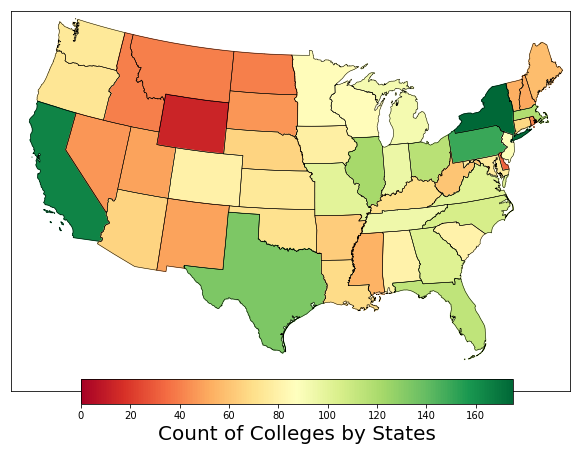

In [32]:
# the below chuck of code is used to plot the contour map of continental US states
# as well as using hue to denote the difference in count of colleges in each state

# define fig and ax for plotting
fig, ax = plt.subplots()

# define map variable to load shape file and draw bounds
map = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states' to call states
map.readshapefile('st99_d00', name='states', drawbounds=True)

# use colors as Red, Yellow, Green hue to denote higher counts to lower counts
colors={}
statenames=[]
cmap = plt.cm.RdYlGn

vmin = 0; vmax = 175 # set range as the highest count to the lowest count
norm = Normalize(vmin=vmin, vmax=vmax) # normalize the min and max for math calculation

# Loop through each state to draw the contours and color the states
# Since we are only concerned with continental US, we are skipping Puerto Rico in the loop
for shapedict in map.states_info:
    statename = shapedict['NAME']
    # Skip Puerto Rico.
    if statename not in ['Puerto Rico']:
        state = [key for key, value in short_state_names.items() if value == statename][0]
        count = state_count_dict[state] #6
    # Skip Puerto Rico.
    if statename not in ['Puerto Rico']:
        # calling colormap with values between 0 and 1 returns rgba value.
        colors[statename] = cmap(np.sqrt((count-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)

for nshape,seg in enumerate(map.states):
    # Skip Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]])       
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
        
# construct a colorbar for scale
cax = fig.add_axes([0.27, 0.1, 0.5, 0.05]) # posititon of the color bar
cb = ColorbarBase(cax,cmap=cmap,norm=norm, orientation='horizontal')
cb.ax.set_xlabel('Count of Colleges by States',fontsize=20)

plt.show();

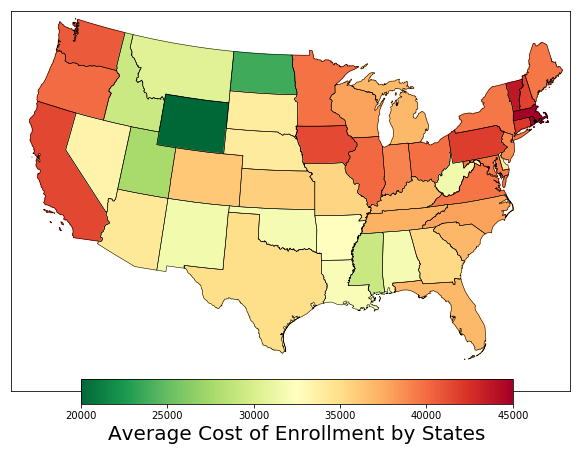

In [33]:
# the below chuck of code is used to plot the contour map of continental US states
# as well as using hue to denote the difference in average cost of attendance in each state

# define fig and ax for plotting
fig, ax = plt.subplots()

# define map variable to load shape file and draw bounds
map = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states' to call states
map.readshapefile('st99_d00', name='states', drawbounds=True)

# use colors as Red, Yellow, Green hue to denote higher avg cost to lower avg cost
colors={}
statenames=[]
cmap = plt.cm.RdYlGn_r 

vmin = 20000; vmax = 45000 # set range as the highest avg cost to the lowest avg cost
norm = Normalize(vmin=vmin, vmax=vmax) # normalize the min and max for math calculation

# Loop through each state to draw the contours and color the states
# Since we are only concerned with continental US, we are skipping Puerto Rico in the loop
for shapedict in map.states_info:
    statename = shapedict['NAME']
    # Skip Puerto Rico.
    if statename not in ['Puerto Rico']:
        state = [key for key, value in short_state_names.items() if value == statename][0]
        cost = state_avg_cost_dict[state] #6
    # Skip Puerto Rico.
    if statename not in ['Puerto Rico']:
        # calling colormap with values between 0 and 1 returns rgba value.
        colors[statename] = cmap(np.sqrt((cost-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)

for nshape,seg in enumerate(map.states):
    # Skip Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]])       
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
        
# construct a colorbar for scale
cax = fig.add_axes([0.27, 0.1, 0.5, 0.05]) # posititon of the color bar
cb = ColorbarBase(cax,cmap=cmap,norm=norm, orientation='horizontal')
cb.ax.set_xlabel('Average Cost of Enrollment by States',fontsize=20)

plt.show();

#### RQ2: How does racial diversity change by different types of colleges (public vs. private) and different regions?

Racial diversity is an important consideration for international students when applying to colleges, this section will segment racial diversity compostion by types of colleges and regions to help users get a visualized distribution of diversity index. 

For easier interpretation, there will be two additional data preparation steps:

    1. Create a new dataframe to only include REGION, CONTROL and Racial information.
        ['Institution_Name','REGION_RENAME','CONTROL','UG',
         'Non_Resident_Alien','Unknown_Race','White','Black',
         'Asian_Pacific_Islander','Native_American','Hispanic']
    2. Merge two kinds of Private control into 'Private' for easier side-by-side comparison.
        ['CONTROL']:
            1:Public
            2:Private nonprofit
            3:Private for-profit
        Merged as ['CONTROL_MERGED']:
            'Private'
            'Public'

In [34]:
# create a dataframe that only include school name, control, undergraduate racial composition
racial_composition = scorecard_clean[['Institution_Name','REGION_RENAME','CONTROL','UG',
                                      'Non_Resident_Alien','Unknown_Race','White','Black',
                                      'Asian_Pacific_Islander','Native_American','Hispanic']]

In [35]:
racial_composition.shape
racial_composition.head()

(2062, 11)

,Institution_Name,REGION_RENAME,CONTROL,UG,Non_Resident_Alien,Unknown_Race,White,Black,Asian_Pacific_Islander,Native_American,Hispanic
0,Alabama A & M University,Southeast,1,4380.0,0.0388,0.0014,0.0459,0.9055,0.0030,0.0027,0.0027
1,University of Alabama at Birmingham,Southeast,1,10331.0,0.0331,0.0266,0.6124,0.2861,0.0286,0.0031,0.0101
2,Amridge University,Southeast,2,98.0,0.0000,0.0000,0.6837,0.2347,0.0204,0.0000,0.0612
3,University of Alabama in Huntsville,Southeast,1,5220.0,0.0410,0.0487,0.6912,0.1435,0.0366,0.0205,0.0186
4,Alabama State University,Southeast,1,4348.0,0.0030,0.0313,0.0435,0.9172,0.0018,0.0005,0.0028


In [36]:
# check unique values of CONTROL before merging
racial_composition.CONTROL.unique()

array([1, 2, 3])

In [37]:
# merge control 2 and 3 into Private and the rest as Public
racial_composition['CONTROL_MERGED'] = np.where(racial_composition['CONTROL'].isin([2,3]), 'Private','Public')

In [38]:
racial_composition.head()

,Institution_Name,REGION_RENAME,CONTROL,UG,Non_Resident_Alien,Unknown_Race,White,Black,Asian_Pacific_Islander,Native_American,Hispanic,CONTROL_MERGED
0,Alabama A & M University,Southeast,1,4380.0,0.0388,0.0014,0.0459,0.9055,0.0030,0.0027,0.0027,Public
1,University of Alabama at Birmingham,Southeast,1,10331.0,0.0331,0.0266,0.6124,0.2861,0.0286,0.0031,0.0101,Public
2,Amridge University,Southeast,2,98.0,0.0000,0.0000,0.6837,0.2347,0.0204,0.0000,0.0612,Private
3,University of Alabama in Huntsville,Southeast,1,5220.0,0.0410,0.0487,0.6912,0.1435,0.0366,0.0205,0.0186,Public
4,Alabama State University,Southeast,1,4348.0,0.0030,0.0313,0.0435,0.9172,0.0018,0.0005,0.0028,Public


* **Racial Diversity By Control Types**: We can see from the bar chart below, public schools have a higher percentage of all minority groups in terms of races (Black, Asian, Pacific Islander, Native American and Hispanic), whereas private schools have higher percentage of White students. One thing to point out here, which was not hypothesized in the project plan, is the fact that private schools have a significantly higher percentage of non resident alien students. One reason behind this is that public schools are targeted to provide higher education to citizens and residents within the state for funding reasons, while private school does not have residents in the each state as a priority. The students selection process and composition is therefore different between these two types of school controls. As an international student, it might be better to apply to more private schools than public schools, both for a higher chance of admission and a more diverse student body.

In [39]:
# pivot the dataframe to calculate mean racial composition by Private and Public Schools
pivot_racial = racial_composition.groupby('CONTROL_MERGED').agg({'Non_Resident_Alien':'mean',
                                                                 'Unknown_Race':'mean', 
                                                                 'White':'mean','Black':'mean',
                                                                 'Asian_Pacific_Islander':'mean',
                                                                 'Native_American':'mean','Hispanic':'mean'})
# Transpose the pivot for side-by-side comparison
pivot_racial = pivot_racial.T
pivot_racial

CONTROL_MERGED,Private,Public
Non_Resident_Alien,0.034417,0.019693
Unknown_Race,0.054785,0.036158
White,0.713327,0.692580
Black,0.108001,0.135379
Asian_Pacific_Islander,0.034202,0.043042
Native_American,0.006041,0.013307
Hispanic,0.047533,0.058033


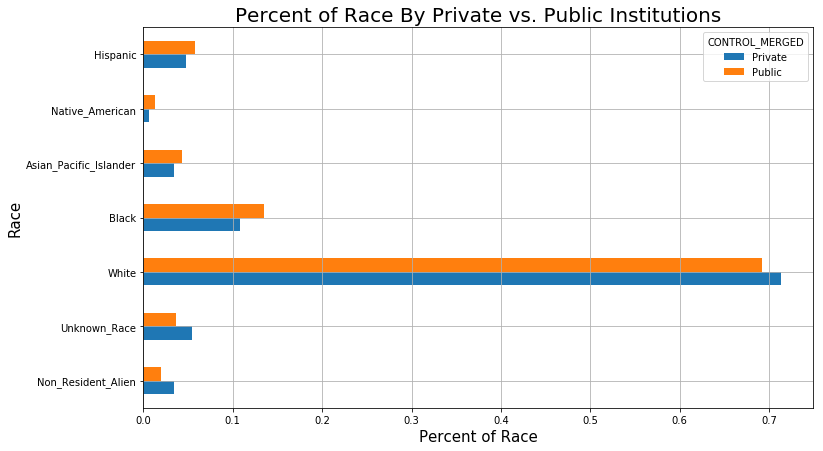

In [40]:
# Use bar chart to compare each race between Private and Public Schools
pivot_racial.plot(kind='barh', grid=True)
plt.xlabel('Percent of Race',fontsize=15)
plt.ylabel('Race',fontsize=15)
plt.title('Percent of Race By Private vs. Public Institutions',fontsize=20)
plt.show();

* **Racial Diversity By Regions**: It is very clear from the below stacked bar chart that Far West and Southwest has the most racial diverse student body. The diversity is different in regions, Far West has more Asian/Pacific Islander and Hispanic whereas Southwest has more Black students. As international students, users can see that Far West also has the biggest percentage for Non_resident_alien students. 

In [41]:
# pivot the dataframe to calculate mean racial composition by Regions
pivot_region = racial_composition.groupby('REGION_RENAME').agg({'White':'mean','Black':'mean',
                                                                'Asian_Pacific_Islander':'mean',
                                                                'Native_American':'mean',
                                                                'Hispanic':'mean',
                                                                'Non_Resident_Alien':'mean','Unknown_Race':'mean'})
pivot_region

,White,Black,Asian_Pacific_Islander,Native_American,Hispanic,Non_Resident_Alien,Unknown_Race
REGION_RENAME,,,,,,,
Far West,0.566105,0.047676,0.121765,0.012294,0.108322,0.049702,0.088665
Great Lakes,0.790421,0.089671,0.024524,0.004233,0.031528,0.022611,0.037021
Mid East,0.715334,0.112079,0.038292,0.002645,0.047669,0.027805,0.053349
New England,0.740920,0.044944,0.038048,0.005426,0.034781,0.042057,0.093823
Plains,0.836957,0.047241,0.022354,0.009137,0.019738,0.024489,0.040080
Rocky Mountains,0.773800,0.021608,0.022675,0.019878,0.047918,0.036243,0.077882
Southeast,0.659998,0.241166,0.016284,0.004449,0.028605,0.026268,0.023233
Southwest,0.596692,0.120544,0.030446,0.036151,0.150834,0.023401,0.034415


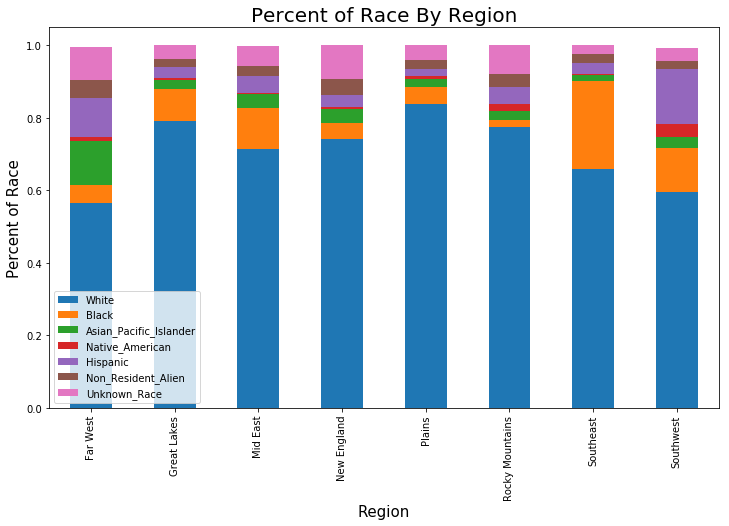

In [42]:
# Use stacked bar chart to compare racial composition across difference regions
pivot_region.plot.bar(stacked=True)
plt.ylabel('Percent of Race',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.title('Percent of Race By Region',fontsize=20)
plt.show();

#### RQ3: What are factors for higher post-school earnings?

In order to make the regression models meaningful, we need to do one last step of data preparation before building a regression model to determine what factors are potential indicators of higher post-school earnings. We will be joining scorecard_clean and earnings data after removing all the Null and 'PrivacySuppressed' values from earning dataframe.

We will only keep variables that are relevant to answer this question, we are using Median measures for post-school earnings since it is able to represent less skewed earnings.

    scorecard_limited: ['Institution_Name','STATE','CONTROL','ADM_RATE','COSTT4_A','AVGFACSAL','PCTFLOAN']
    earning_limited: ['Institution_Name','UNEMP_RATE','MD_EARN_WNE_P10','MD_EARN_WNE_P6']
    
We again will combine control type into only Private vs. Public to facilitate side-by-side comparisons.

In [43]:
# limiting both scorecard data and earnings data to include only relevant variables
# remove Null and PrivacySuppressed values in earnings data for later regression model
scorecard_clean.shape
earning_clean.shape
scorecard_limited = scorecard_clean[['Institution_Name','STATE','CONTROL','ADM_RATE','COSTT4_A','AVGFACSAL','PCTFLOAN']]
earning_limited = earning_clean[['Institution_Name','UNEMP_RATE','MD_EARN_WNE_P10','MD_EARN_WNE_P6']].dropna()
earning_limited.shape

(2062, 25)

(7175, 20)

(5059, 4)

In [44]:
# merging two types of private schools into just Private vs. Public
# we will then drop the original int type of CONTROL after merging
scorecard_limited['CONTROL_MERGED'] = np.where(scorecard_limited['CONTROL'].isin([2,3]), 'Private','Public')
scorecard_limited = scorecard_limited.drop(['CONTROL'],axis=1)
scorecard_limited.shape

(2062, 7)

In order to analysis school metrics with earning metrics, we are merging scorecard data with earning data by school names. Since we removed data points due to Null values, the merged dataframe contains 1488 rows(schools) and 10 columns(metric variables) for regression analysis.

In [45]:
# merging scorecard_limited and earning_limited on Institution_Name to create dataframe for regression
earning_analysis = scorecard_limited.merge(earning_limited, how='inner', 
                                           left_on='Institution_Name', 
                                           right_on='Institution_Name')

In [46]:
# some of the value types of earning data are not in numeric form for modeling
# changing data types to numeric for modeling
# we also want to model private and public schools separately when possible, so changing the type to categorical
earning_analysis["UNEMP_RATE"] = pd.to_numeric(earning_analysis.UNEMP_RATE, errors='coerce')
earning_analysis["MD_EARN_WNE_P10"] = pd.to_numeric(earning_analysis.MD_EARN_WNE_P10, errors='coerce')
earning_analysis["MD_EARN_WNE_P6"] = pd.to_numeric(earning_analysis.MD_EARN_WNE_P6, errors='coerce')
earning_analysis['CONTROL_MERGED'] = earning_analysis['CONTROL_MERGED'].astype('category')
earning_analysis = earning_analysis.dropna()
earning_analysis.shape
earning_analysis.head()

(1488, 10)

,Institution_Name,STATE,ADM_RATE,COSTT4_A,AVGFACSAL,PCTFLOAN,CONTROL_MERGED,UNEMP_RATE,MD_EARN_WNE_P10,MD_EARN_WNE_P6
0,Alabama A & M University,AL,0.8738,22667.0,7028.0,0.7667,Public,4.84,31000.0,25200.0
1,University of Alabama at Birmingham,AL,0.5814,22684.0,10517.0,0.5179,Public,3.45,41200.0,35100.0
3,University of Alabama in Huntsville,AL,0.7628,22059.0,9463.0,0.4312,Public,3.64,46700.0,36200.0
4,Alabama State University,AL,0.4590,19242.0,7952.0,0.8113,Public,4.81,27700.0,22600.0
5,The University of Alabama,AL,0.5259,28422.0,9802.0,0.4007,Public,3.26,44500.0,37400.0


In order to get a meaningful coefficient on all explainatory variables, we will normalize all the numeric columns before model fitting. After normalization, all the earnings value will be on a 0 to 1 scale.

In [47]:
# get an overview of all column data types
earning_analysis.dtypes

Institution_Name      object
STATE                 object
ADM_RATE             float64
COSTT4_A             float64
AVGFACSAL            float64
PCTFLOAN             float64
CONTROL_MERGED      category
UNEMP_RATE           float64
MD_EARN_WNE_P10      float64
MD_EARN_WNE_P6       float64
dtype: object

In [48]:
# importing a statsmodels package for regression modeling
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as sm

In [49]:
# apply scalers on all numeric values, so that all the numeric variables will be evaluated on a scale of 0 to 1
earning_analysis_norm = earning_analysis.copy(deep=True)
Scaler = MinMaxScaler()
earning_analysis_norm[['ADM_RATE', 'COSTT4_A','AVGFACSAL','PCTFLOAN','UNEMP_RATE','MD_EARN_WNE_P10','MD_EARN_WNE_P6']] = Scaler.fit_transform(earning_analysis_norm[['ADM_RATE', 'COSTT4_A','AVGFACSAL','PCTFLOAN','UNEMP_RATE','MD_EARN_WNE_P10','MD_EARN_WNE_P6']])

In [50]:
earning_analysis_norm.head()

,Institution_Name,STATE,ADM_RATE,COSTT4_A,AVGFACSAL,PCTFLOAN,CONTROL_MERGED,UNEMP_RATE,MD_EARN_WNE_P10,MD_EARN_WNE_P6
0,Alabama A & M University,AL,0.867423,0.196541,0.246999,0.787086,Public,0.489209,0.150499,0.124874
1,University of Alabama at Birmingham,AL,0.560248,0.196829,0.420780,0.531670,Public,0.239209,0.242974,0.224572
3,University of Alabama in Huntsville,AL,0.750814,0.186242,0.368282,0.442665,Public,0.273381,0.292838,0.235650
4,Alabama State University,AL,0.431663,0.138526,0.293022,0.832871,Public,0.483813,0.120580,0.098691
5,The University of Alabama,AL,0.501943,0.294024,0.385167,0.411354,Public,0.205036,0.272892,0.247734


### Model fit

**Three Regression Models:** From the normalized data, I was able to explore the relationships between earnings 10 years after entry, earnings 6 years after entry and unemployment rate against three potential indicators: cost of attendance, admission rate and percentage of federal loan. The below three regression models tell a consistent yet interesting story. 

* Cost of attendance is a statistically significant positive indicator of post-school earnings, that is to say, the higher the average cost of attendance, the higher median post school earnings. The effect of cost is slightly larger for 10 years after entry than 6 years, while we also see a larger spread of earnings distribution in 10 years than 6 years. Averaging cost of attendance is also a statistically significant negative indicator of unemployment rate, meaning the higher the average cost of attendance, the lower of the unemployment rate for the school. Both of these results align with the original hypothesis. 
    
* Admission rate, however, is not consistently a statistically significant indicator for post-school earnings. It has a p-value of 0.002 for 10 years after entry, although having a slightly negative effect, and has a p-value of 0.169 for 6 years after entry, which does not have statistically significant predicative power. Therefore, we can not conclude the effect of admission rate on earnings with this model set up. Admission rate does have a statistically significant negative predicative power for unemployment rate. 
    
* Percent of Federal Loans does not have a result that align with the original hypothesis. Both models with post-school earnings show that percent of federal loans is a negative predicative variable for earnings. Further investigations are needed to detect why providing federal loans to students has a negative effect on future earning outcomes. We should also check schools that have higher percent of federal loans and see if there are other common characteristics associated with getting more loans.

In [51]:
# fit ordinary least squares regression on cost of attendance, 
# admission rate and percent of federal loan against eanings
result_10year = sm.ols(formula="MD_EARN_WNE_P10 ~ COSTT4_A + ADM_RATE + PCTFLOAN", 
                       data=earning_analysis_norm).fit()
result_10year.params
result_10year.summary()

Intercept    0.332428
COSTT4_A     0.170243
ADM_RATE    -0.037554
PCTFLOAN    -0.179575
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MD_EARN_WNE_P10   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     206.7
Date:                Sun, 09 Dec 2018   Prob (F-statistic):          5.26e-112
Time:                        20:23:43   Log-Likelihood:                 1527.9
No. Observations:                1488   AIC:                            -3048.
Df Residuals:                    1484   BIC:                            -3026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3324      0.011     30.001      0.000       0.311       0.354
COSTT4_A       0.1702      0.010     17.847      0.000       0.152       0.189
ADM_RATE      -0.0376      0.012     -3.150      0.002      -0.061      -0.014
PCTFLOAN      -0.1796      0.013    -13.557      0.000      -0.206      -0.154
==============================================================================
Omnibus:                      516.309   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4859.031
Skew:                           1.341   Prob(JB):                         0.00
Kurtosis:                      11.437   Cond. No.                         9.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# fit ordinary least squares regression on cost of attendance, 
# admission rate and percent of federal loan against eanings
result_6year = sm.ols(formula="MD_EARN_WNE_P6 ~ COSTT4_A + ADM_RATE + PCTFLOAN", 
                       data=earning_analysis_norm).fit()
result_6year.params
result_6year.summary()

Intercept    0.265175
COSTT4_A     0.128978
ADM_RATE    -0.015166
PCTFLOAN    -0.131230
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MD_EARN_WNE_P6   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     127.2
Date:                Sun, 09 Dec 2018   Prob (F-statistic):           2.60e-73
Time:                        20:23:43   Log-Likelihood:                 1643.4
No. Observations:                1488   AIC:                            -3279.
Df Residuals:                    1484   BIC:                            -3258.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2652      0.010     25.865      0.000       0.245       0.285
COSTT4_A       0.1290      0.009     14.613      0.000       0.112       0.146
ADM_RATE      -0.0152      0.011     -1.375      0.169      -0.037       0.006
PCTFLOAN      -0.1312      0.012    -10.708      0.000      -0.155      -0.107
==============================================================================
Omnibus:                      562.805   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5934.322
Skew:                           1.456   Prob(JB):                         0.00
Kurtosis:                      12.340   Cond. No.                         9.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# fit ordinary least squares regression on cost of attendance, 
# admission rate and percent of federal loan against eanings
result_unemployment = sm.ols(formula="UNEMP_RATE ~ COSTT4_A + ADM_RATE + PCTFLOAN", 
                             data=earning_analysis_norm).fit()
result_unemployment.params
result_unemployment.summary()

Intercept    0.362776
COSTT4_A    -0.183817
ADM_RATE    -0.105645
PCTFLOAN     0.024153
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             UNEMP_RATE   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     60.79
Date:                Sun, 09 Dec 2018   Prob (F-statistic):           4.59e-37
Time:                        20:23:43   Log-Likelihood:                 977.17
No. Observations:                1488   AIC:                            -1946.
Df Residuals:                    1484   BIC:                            -1925.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3628      0.016     22.613      0.000       0.331       0.394
COSTT4_A      -0.1838      0.014    -13.309      0.000      -0.211      -0.157
ADM_RATE      -0.1056      0.017     -6.121      0.000      -0.140      -0.072
PCTFLOAN       0.0242      0.019      1.259      0.208      -0.013       0.062
==============================================================================
Omnibus:                      521.567   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2186.970
Skew:                           1.641   Prob(JB):                         0.00
Kurtosis:                       7.951   Cond. No.                         9.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Visualizing the trend

The below graph visualizes the correlation between cost of attendance and median earning after 10 years of entry, and we can see the regression line conveys the same message as the regression summary: the higher the average cost of attendance the higher the median earnings 10 years after entry.

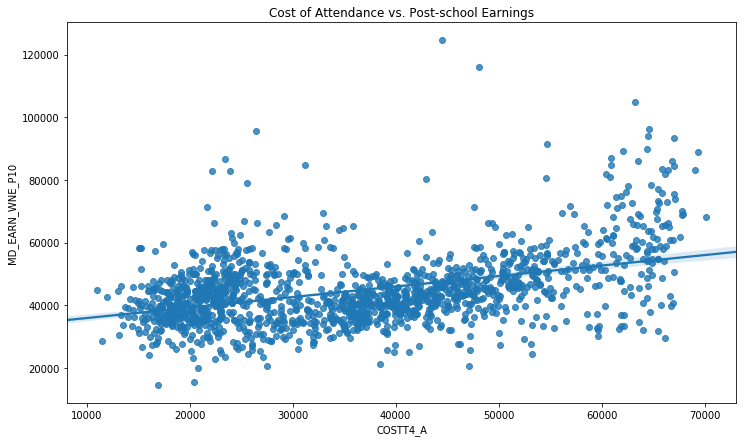

In [54]:
# Plot the correlation between earnings and average cost of attendance
sns.regplot(x='COSTT4_A',
            y='MD_EARN_WNE_P10', 
            data=earning_analysis).set_title('Cost of Attendance vs. Post-school Earnings');

The regression scatterplot below visualizes the negative correlation between admission rate and post-school earnings. This plot explains more of the potential reasons for a negative correlation than the regression summary. We can see that there are clusters of high admission rate schools around 0.6 to 0.8 mark, these schools do not provide a clear correlation for the post-school earnings. At the same time, potentially school that have less strict criteria for admitting students may not be able to filter out unqualified candidates, thus resulting in the lower post-school earning.

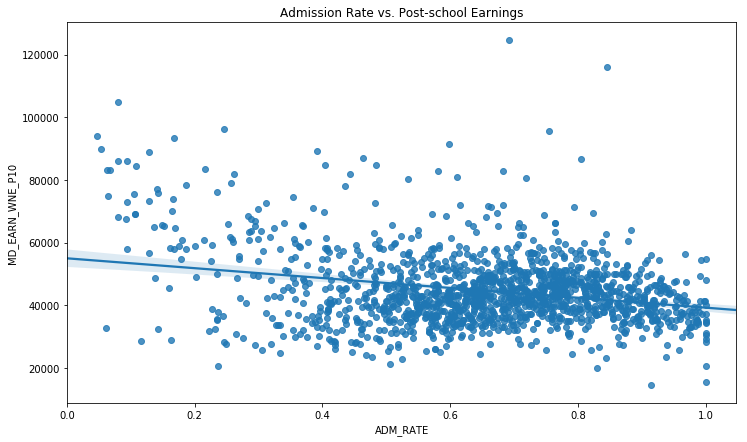

In [55]:
# Plot the correlation between earnings and admission rate
sns.regplot(x='ADM_RATE',
            y='MD_EARN_WNE_P10', 
            data=earning_analysis).set_title('Admission Rate vs. Post-school Earnings');

From the below visualization, we can see that there are several outlier schools on the lower lefthand side of the plot, further investigation can start from potential outliers.

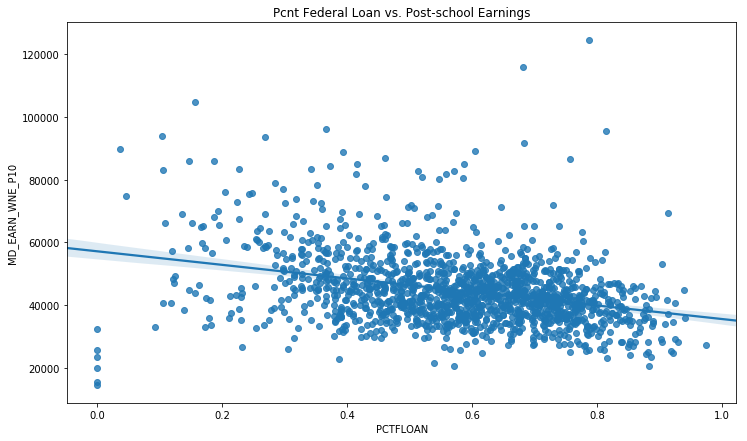

In [56]:
# Plot the correlation between earnings and pcnt federal loan
sns.regplot(x='PCTFLOAN',
            y='MD_EARN_WNE_P10', 
            data=earning_analysis).set_title('Pcnt Federal Loan vs. Post-school Earnings');

Below graph tells a slightly different picture. While still fitting average cost of attendance variable agasint post-school earnings, this graph also compared private and public schools separately. From the graph, we can see the regression lines difference between private and public schools, although the scatterplot shows while average cost of attendance is below 50,000 per year, there is no significant difference in post-school earnings between the two type of school controls.

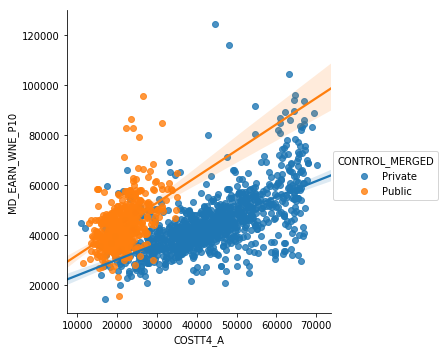

In [57]:
sns.lmplot(x="COSTT4_A", y="MD_EARN_WNE_P10", 
           data=earning_analysis, 
           fit_reg=True, 
           hue='CONTROL_MERGED', 
           legend=True).set_titles('Cost of Attendance vs. Post-school Earnings By types of school');

## Limitations and Implications

This analysis is currently designed for a very specific user persona, an international student who does not have preference of states or regions and does not have access to federal loans. Therefore, there are a lot we can expand on as we expand to a broader audience.

### Normalization Considerations

Because of the consideration of end users, this analysis does not take characteristics of each state and region into account. Specifically, we can gather more data on state level population and median household income to normalize against the availability and accessbility of the schools. For example, Wyoming has the least number of schools and cheapest cost of attendance, we would get a more complete picture if we can analyze whether Wyoming also has the least number of school age population and the lowest median household income. These factors will help explain some of the trends we see on the state level.

### Modeling Considerations

In the three regression models, I chose to use three variables that I think should have some predicative power over post-school earnings. However, the full dataset provide over 1800 variables, all of which could be related to post-school earnings. For future work, I want to explore other variables to see if there are other interesting trend explaining potential relationships with post-school earnings.

### Interpretation Considerations

From the model, we concluded that average cost of attendance is a statistically significant predictor of post-school earnings. However, there are other collinearity considerations between these two variables. For example, both higher cost of attendance and higher earnings can be caused by higher cost of living, which could potentially be explained by incorporating income data. These casual claims will need further investigations and validations.

## Conclusions

There three main findings from this analysis of College Scorecard Dataset:

* There are significant differences in terms of education availability, education accessibility across US states and regions. These differences can limit students' ability to attain higher education and should be addressed through state governments.
* Racial diversity is different between private and public schools and different across different regions. Applicants should be made aware of these diversity difference before applying to schools.
* Cost of attendance is a statistically significant positive indicator of post-school earnings, however, more comprehensive analysis is needed to make the casual claim.

This project is also designed with the end users in mind. The graphs and results are built to help international students to become informed of the differences across states and regions in the United States so they can make better decisions when applying without having been to the States. The map visualizations are made to help convey the message of the difference between coastal regions and inland regions, and the other bargraphs and scartterplot are made so that the interpretation of modeling results are easily understood.

There are also a lot more interesting trends to be discovered in this rich dataset to help applicants make informed decisions and to help government officials understand the education ecosystem.

## References

* https://collegescorecard.ed.gov/data/
* https://collegescorecard.ed.gov/data/documentation/
* https://collegescorecard.ed.gov
* https://www.brookings.edu/research/using-earnings-data-to-rank-colleges-a-value-added-approach-updated-with-college-scorecard-data/